In [1]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="Api")
project = rf.workspace("so-d4hcz").project("all_finalize")
version = project.version(3)
dataset = version.download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to all_finalize--3 in yolov8-obb:: 100%|██████████| 12566/12566 [00:01<00:00, 6656.91it/s]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir("/content/drive/MyDrive/k")
print(os.getcwd())

/content/drive/MyDrive/k


In [7]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.9/802.9 kB 8.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [8]:
from ultralytics import YOLO

In [11]:
model = YOLO("yolov8n.pt")

In [ ]:
model.train(model ="yolo8n.pt",data="data.yaml", epochs=30)

In [28]:
import cv2
import matplotlib.pyplot as plt


In [14]:
model_path = os.path.join('.', 'runs','detect','train2','weights', 'last.pt')

# Load a model
model = YOLO(model_path)


In [41]:
#for image prediction
def get_prediction2(img):
    global model
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = model(img_rgb)[0]
    threshold = 0.5

    for res in result.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = res
        print(score)
        if score > threshold:
            cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 6)
            cv2.putText(img_rgb, result.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 2, cv2.LINE_AA)

    # im_path = os.path.join('.', 'result', os.path.basename(img))
    # imgname = f'{im_path[:-4]}_output.jpg'
    # # imgname = f"images/{img}.jpg"
    # frame.resize
    # cv2.imwrite(imgname, img_rgb)
    # plt.imshow(img_rgb)
    # plt.show()

    return img_rgb


0: 640x640 2 Cupboards, 2 Exhaust Hoods, 2 Ovens, 1 Sink, 4 Stoves, 12.6ms
Speed: 4.0ms preprocess, 12.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
0.979259729385376
0.9493665099143982
0.9158849716186523
0.8337377309799194
0.6885228157043457
0.6563583016395569
0.6240718364715576
0.5807546973228455
0.46641790866851807
0.32530221343040466
0.29867151379585266


array([[[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       ...,

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]],

       [[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [11, 11, 11],
        [11, 11, 11],
        [11, 11, 11]]], dtype=uint8)
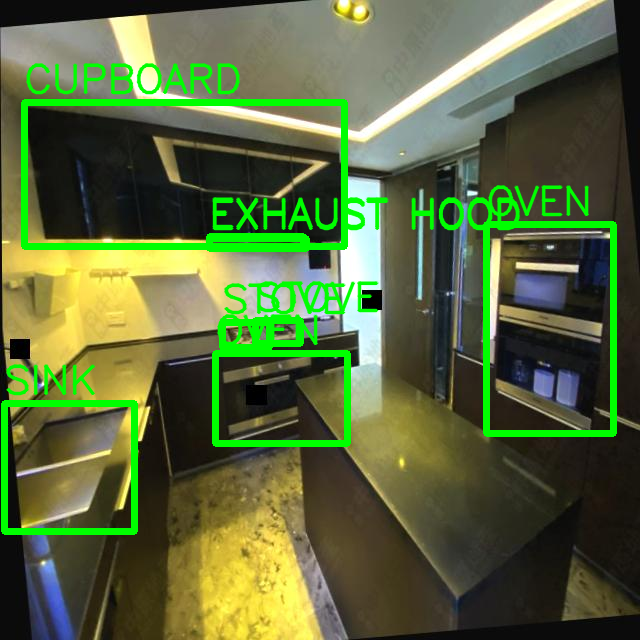

In [42]:

get_prediction2(cv2.imread("test-image/img_1.jpg"))


0: 640x640 1 Cupboard, 1 Faucet, 1 Oven, 1 Sink, 1 Stove, 9.9ms
Speed: 3.4ms preprocess, 9.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
0.8817265629768372
0.7681599855422974
0.4418070316314697
0.4004686176776886
0.2965738773345947


array([[[77, 77, 77],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [78, 76, 79],
        [77, 75, 78],
        [77, 75, 78]],

       [[77, 77, 77],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [77, 75, 78],
        [77, 75, 78],
        [76, 74, 77]],

       [[77, 77, 77],
        [77, 77, 77],
        [77, 77, 77],
        ...,
        [79, 77, 78],
        [79, 77, 78],
        [79, 77, 78]],

       ...,

       [[76, 78, 77],
        [76, 78, 77],
        [76, 78, 77],
        ...,
        [77, 76, 81],
        [77, 77, 79],
        [77, 77, 79]],

       [[77, 77, 75],
        [77, 77, 75],
        [77, 77, 75],
        ...,
        [78, 76, 81],
        [77, 77, 79],
        [77, 77, 79]],

       [[77, 77, 75],
        [77, 77, 75],
        [77, 77, 75],
        ...,
        [78, 76, 81],
        [77, 77, 79],
        [77, 77, 79]]], dtype=uint8)
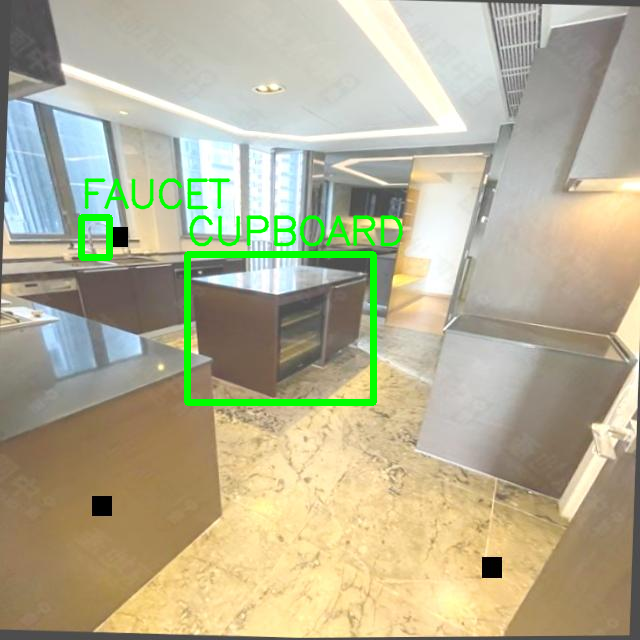

In [43]:
get_prediction2(cv2.imread("test-image/img_2.jpg"))


0: 640x640 1 AC, 1 Bed, 1 Closet, 7.5ms
Speed: 3.3ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
0.9292235970497131
0.8458225727081299
0.791862428188324


array([[[ 65,  60,  56],
        [ 65,  60,  56],
        [ 65,  60,  56],
        ...,
        [148, 152, 164],
        [148, 152, 164],
        [148, 152, 164]],

       [[ 65,  60,  56],
        [ 65,  60,  56],
        [ 65,  60,  56],
        ...,
        [150, 154, 166],
        [150, 154, 166],
        [150, 154, 166]],

       [[ 65,  60,  56],
        [ 65,  60,  56],
        [ 65,  60,  56],
        ...,
        [154, 158, 170],
        [154, 158, 170],
        [154, 158, 170]],

       ...,

       [[ 19,   2,  10],
        [ 20,   3,  11],
        [ 19,   4,  11],
        ...,
        [ 63,  26,  18],
        [ 60,  23,  15],
        [ 56,  22,  13]],

       [[ 19,   2,  10],
        [ 19,   2,  10],
        [ 19,   4,  11],
        ...,
        [ 54,  19,  13],
        [ 51,  16,  10],
        [ 48,  15,   8]],

       [[ 19,   2,  10],
        [ 19,   2,  10],
        [ 19,   4,  11],
        ...,
        [ 50,  15,   9],
        [ 45,  12,   5],
        [ 42,   9,   2]]], dtype=uint8)
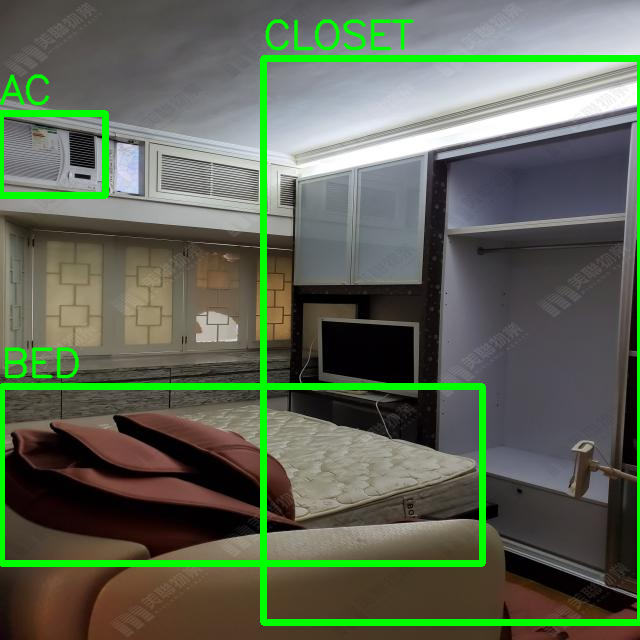

In [44]:
get_prediction2(cv2.imread("test-image/img_3.jpg"))


0: 640x640 1 Faucet, 2 Toilet Sinks, 10.7ms
Speed: 2.7ms preprocess, 10.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
0.92153400182724
0.5408942699432373
0.49203014373779297


array([[[191, 126,  88],
        [205, 140, 102],
        [208, 140, 101],
        ...,
        [209, 138,  74],
        [207, 136,  72],
        [194, 123,  59]],

       [[207, 142, 104],
        [221, 156, 116],
        [224, 156, 117],
        ...,
        [218, 147,  83],
        [216, 145,  81],
        [203, 132,  68]],

       [[199, 134,  94],
        [213, 148, 108],
        [216, 149, 107],
        ...,
        [219, 148,  84],
        [217, 146,  82],
        [204, 133,  69]],

       ...,

       [[102,  53,  20],
        [100,  51,  18],
        [101,  53,  17],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[ 97,  51,  17],
        [ 98,  52,  18],
        [104,  55,  22],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[ 93,  47,  13],
        [ 96,  50,  16],
        [104,  55,  22],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]], dtype=uint8)
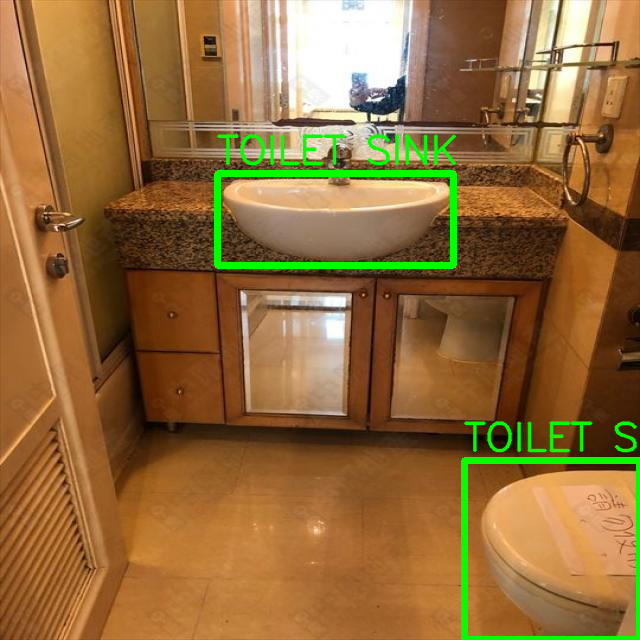

In [45]:
get_prediction2(cv2.imread("test-image/img_4.jpg"))


0: 640x640 1 Bed, 9.3ms
Speed: 3.5ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
0.8970187306404114


array([[[  0,   1,   4],
        [  0,   1,   2],
        [  1,   1,   3],
        ...,
        [  1,   0,   0],
        [  1,   0,   0],
        [  1,   0,   0]],

       [[  0,   1,   4],
        [  0,   1,   2],
        [  1,   1,   3],
        ...,
        [  1,   0,   0],
        [  1,   0,   0],
        [  1,   0,   0]],

       [[  0,   1,   4],
        [  0,   1,   2],
        [  1,   1,   3],
        ...,
        [  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1]],

       ...,

       [[  1,   0,   0],
        [  1,   0,   0],
        [  1,   0,   0],
        ...,
        [163, 104,  62],
        [165, 106,  64],
        [165, 106,  62]],

       [[  3,   0,   0],
        [  1,   0,   0],
        [  1,   0,   0],
        ...,
        [163, 104,  62],
        [165, 106,  64],
        [165, 106,  62]],

       [[  3,   0,   0],
        [  3,   0,   0],
        [  1,   0,   0],
        ...,
        [163, 104,  62],
        [165, 106,  64],
        [164, 105,  61]]], dtype=uint8)
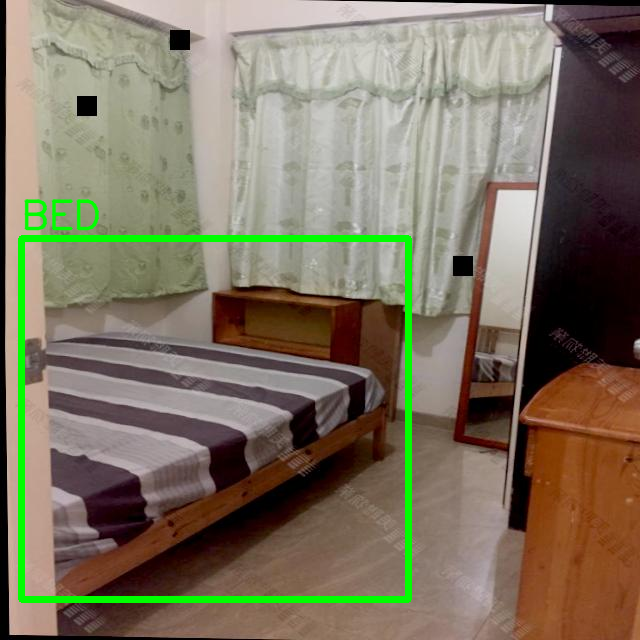

In [46]:
get_prediction2(cv2.imread("test-image/img_5.jpg"))